In [21]:
import pandas as pd
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the large dataset into a pandas dataframe hate_crime.csv
data = pd.read_csv('hate_crime.csv', encoding='latin1')
data

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,NaN,County,AR,Arkansas,West South Central,South,...,White,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241658,1473449,2022,WY0190200,Rock Springs,NaN,City,WY,Wyoming,Mountain,West,...,White,Hispanic or Latino,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
241659,1473450,2022,WY0010200,University of Wyoming,NaN,University or College,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,School-College/University,Anti-Gay (Male),Individual,S,S
241660,1476554,2022,WY0190000,Sweetwater,NaN,County,WY,Wyoming,Mountain,West,...,White,Multiple,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Hispanic or Latino,Individual,S,S
241661,1476555,2022,WY0110100,Cheyenne,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S


# Data Cleaning

In [4]:
# get general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241663 entries, 0 to 241662
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   incident_id                   241663 non-null  int64  
 1   data_year                     241663 non-null  int64  
 2   ori                           241663 non-null  object 
 3   pug_agency_name               241663 non-null  object 
 4   pub_agency_unit               7189 non-null    object 
 5   agency_type_name              241663 non-null  object 
 6   state_abbr                    241663 non-null  object 
 7   state_name                    241663 non-null  object 
 8   division_name                 241663 non-null  object 
 9   region_name                   241663 non-null  object 
 10  population_group_code         241108 non-null  object 
 11  population_group_description  241108 non-null  object 
 12  incident_date                 241663 non-nul

In [5]:
# find the amount of missing values in each column
data.isnull().sum()

incident_id                          0
data_year                            0
ori                                  0
pug_agency_name                      0
pub_agency_unit                 234474
agency_type_name                     0
state_abbr                           0
state_name                           0
division_name                        0
region_name                          0
population_group_code              555
population_group_description       555
incident_date                        0
adult_victim_count              170538
juvenile_victim_count           172978
total_offender_count                 0
adult_offender_count            177148
juvenile_offender_count         177155
offender_race                        0
offender_ethnicity                   0
victim_count                         0
offense_name                         0
total_individual_victims          4859
location_name                        0
bias_desc                            0
victim_types             

# The following columns will be dropped:
1. pub_agency_unit - because it has 234474 missing values
2. adult_victim_count - because it has 170538 missing values
3. juvenile_victim_count - because it has 172978 missing values
4. adult_offender_count - because it has 177148 missing values
5. juvenile_offender_count - because it has 177155 missing values

In [6]:
# drop the columns with missing values
data = data.drop(['pub_agency_unit', 'adult_victim_count', 'juvenile_victim_count', 'adult_offender_count', 'juvenile_offender_count'], axis=1)
data

,incident_id,data_year,ori,pug_agency_name,agency_type_name,state_abbr,state_name,division_name,region_name,population_group_code,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,Black or African American,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,County,AR,Arkansas,West South Central,South,8D,...,White,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241658,1473449,2022,WY0190200,Rock Springs,City,WY,Wyoming,Mountain,West,5,...,White,Hispanic or Latino,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
241659,1473450,2022,WY0010200,University of Wyoming,University or College,WY,Wyoming,Mountain,West,7,...,White,Not Hispanic or Latino,1,Intimidation,1.0,School-College/University,Anti-Gay (Male),Individual,S,S
241660,1476554,2022,WY0190000,Sweetwater,County,WY,Wyoming,Mountain,West,8D,...,White,Multiple,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Hispanic or Latino,Individual,S,S
241661,1476555,2022,WY0110100,Cheyenne,City,WY,Wyoming,Mountain,West,3,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S


The following records with missing values will be dropped:
1. population_group_code - because it has 555 missing values
2. population_group_description - because it has 555 missing values
3. total_individual_victims - because it has 4859 missing values

The records with missing values will be dropped because they are few compared to the total number of records in the dataset.

In [7]:
# drop the records with missing values
data = data.dropna()
data

,incident_id,data_year,ori,pug_agency_name,agency_type_name,state_abbr,state_name,division_name,region_name,population_group_code,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,Black or African American,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,County,AR,Arkansas,West South Central,South,8D,...,White,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241658,1473449,2022,WY0190200,Rock Springs,City,WY,Wyoming,Mountain,West,5,...,White,Hispanic or Latino,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
241659,1473450,2022,WY0010200,University of Wyoming,University or College,WY,Wyoming,Mountain,West,7,...,White,Not Hispanic or Latino,1,Intimidation,1.0,School-College/University,Anti-Gay (Male),Individual,S,S
241660,1476554,2022,WY0190000,Sweetwater,County,WY,Wyoming,Mountain,West,8D,...,White,Multiple,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Hispanic or Latino,Individual,S,S
241661,1476555,2022,WY0110100,Cheyenne,City,WY,Wyoming,Mountain,West,3,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S


In [8]:
# find the info for the offender_ethnicity column
data['offender_ethnicity'].value_counts()

offender_ethnicity
Not Specified             201698
Unknown                    17396
Not Hispanic or Latino     13174
Hispanic or Latino          3192
Multiple                     829
Name: count, dtype: int64

The offender ethnicity column can be dropped because it mostly contains missing values and won't be used in the analysis.

In [9]:
# drop the offender_ethnicity column
data = data.drop(['offender_ethnicity'], axis=1)
data

,incident_id,data_year,ori,pug_agency_name,agency_type_name,state_abbr,state_name,division_name,region_name,population_group_code,...,total_offender_count,offender_race,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,2,Black or African American,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,County,AR,Arkansas,West South Central,South,8D,...,1,White,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241658,1473449,2022,WY0190200,Rock Springs,City,WY,Wyoming,Mountain,West,5,...,1,White,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
241659,1473450,2022,WY0010200,University of Wyoming,University or College,WY,Wyoming,Mountain,West,7,...,1,White,1,Intimidation,1.0,School-College/University,Anti-Gay (Male),Individual,S,S
241660,1476554,2022,WY0190000,Sweetwater,County,WY,Wyoming,Mountain,West,8D,...,2,White,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-Hispanic or Latino,Individual,S,S
241661,1476555,2022,WY0110100,Cheyenne,City,WY,Wyoming,Mountain,West,3,...,8,White,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S


In [10]:
# output the info for the bias_desc column
data['bias_desc'].value_counts()

bias_desc
Anti-Black or African American                                               80210
Anti-Jewish                                                                  27792
Anti-White                                                                   27008
Anti-Gay (Male)                                                              23659
Anti-Hispanic or Latino                                                      15374
                                                                             ...  
Anti-Black or African American;Anti-Gay (Male);Anti-Islamic (Muslim)             1
Anti-Hindu;Anti-Islamic (Muslim);Anti-Other Race/Ethnicity/Ancestry              1
Anti-Gay (Male);Anti-Hispanic or Latino;Anti-Male                                1
Anti-Jewish;Anti-Mental Disability;Anti-White                                    1
Anti-American Indian or Alaska Native;Anti-Female;Anti-Hispanic or Latino        1
Name: count, Length: 345, dtype: int64

There are over 300 unique values in the bias_desc column. The column consists of one or more categories separated by a comma or semicolon. The column will converted into a list of categories.

In [11]:
# remove the special characters from the bias_desc column
data['bias_desc'] = data['bias_desc'].str.replace('(', '')
data['bias_desc'] = data['bias_desc'].str.replace(')', '')

# convert the bias_desc column into a list of categories
data['bias_desc'] = data['bias_desc'].str.replace(';', ',').str.split(',')
data

,incident_id,data_year,ori,pug_agency_name,agency_type_name,state_abbr,state_name,division_name,region_name,population_group_code,...,total_offender_count,offender_race,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,1,Aggravated Assault,1.0,Residence/Home,[Anti-Black or African American],Individual,S,S
1,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,[Anti-White],Individual,M,S
2,45,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,[Anti-White],Individual,M,S
3,46,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,2,Black or African American,1,Intimidation,1.0,Residence/Home,[Anti-White],Individual,S,S
4,47,1991,AR0670000,Sevier,County,AR,Arkansas,West South Central,South,8D,...,1,White,1,Intimidation,1.0,School/College,[Anti-Black or African American],Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241658,1473449,2022,WY0190200,Rock Springs,City,WY,Wyoming,Mountain,West,5,...,1,White,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,[Anti-White],Individual,S,S
241659,1473450,2022,WY0010200,University of Wyoming,University or College,WY,Wyoming,Mountain,West,7,...,1,White,1,Intimidation,1.0,School-College/University,[Anti-Gay Male],Individual,S,S
241660,1476554,2022,WY0190000,Sweetwater,County,WY,Wyoming,Mountain,West,8D,...,2,White,2,Simple Assault,2.0,Highway/Road/Alley/Street/Sidewalk,[Anti-Hispanic or Latino],Individual,S,S
241661,1476555,2022,WY0110100,Cheyenne,City,WY,Wyoming,Mountain,West,3,...,8,White,1,Intimidation,1.0,Residence/Home,[Anti-Black or African American],Individual,S,S


In [12]:
# one hot encode the bias_desc column
def one_hot_encode(column):
    #transforms elements in lists to rows
    types = column.explode() 
    
    # returns the frequency of each type for each index
    oneHotEncode = pd.crosstab(types.index, types)
    
    return oneHotEncode

In [13]:
one_hot_bias_desc = one_hot_encode(data['bias_desc'])
one_hot_bias_desc

bias_desc,Bisexual,Gay,Greek,Group,Other,or Transgender Mixed Group,Anti-American Indian or Alaska Native,Anti-Arab,Anti-Asian,Anti-Atheism/Agnosticism,...,Anti-Multiple Religions,Anti-Native Hawaiian or Other Pacific Islander,Anti-Other Christian,Anti-Other Race/Ethnicity/Ancestry,Anti-Other Religion,Anti-Physical Disability,Anti-Protestant,Anti-Sikh,Anti-Transgender,Anti-White
row_0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
241659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### From the one hot encoded dataframe of the bias_desc column we can see that there are 40 unique categories. The categories will be merged with the original dataset.

In [14]:
# merge the one hot encoded bias_desc column with the original dataset
data = pd.concat([data, one_hot_bias_desc], axis=1)
data

,incident_id,data_year,ori,pug_agency_name,agency_type_name,state_abbr,state_name,division_name,region_name,population_group_code,...,Anti-Multiple Religions,Anti-Native Hawaiian or Other Pacific Islander,Anti-Other Christian,Anti-Other Race/Ethnicity/Ancestry,Anti-Other Religion,Anti-Physical Disability,Anti-Protestant,Anti-Sikh,Anti-Transgender,Anti-White
0,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,0,0,0,0,0,0,0,0,0,0
1,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,0,0,0,0,0,0,0,0,0,1
2,45,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,0,0,0,0,0,0,0,0,0,1
3,46,1991,AR0600300,North Little Rock,City,AR,Arkansas,West South Central,South,3,...,0,0,0,0,0,0,0,0,0,1
4,47,1991,AR0670000,Sevier,County,AR,Arkansas,West South Central,South,8D,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241658,1473449,2022,WY0190200,Rock Springs,City,WY,Wyoming,Mountain,West,5,...,0,0,0,0,0,0,0,0,0,1
241659,1473450,2022,WY0010200,University of Wyoming,University or College,WY,Wyoming,Mountain,West,7,...,0,0,0,0,0,0,0,0,0,0
241660,1476554,2022,WY0190000,Sweetwater,County,WY,Wyoming,Mountain,West,8D,...,0,0,0,0,0,0,0,0,0,0
241661,1476555,2022,WY0110100,Cheyenne,City,WY,Wyoming,Mountain,West,3,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# output the cleaned dataset to a csv file
data.to_csv('cleaned_hate_crime.csv', index=False)

In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 236289 entries, 0 to 241662
Data columns (total 62 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   incident_id                                     236289 non-null  int64  
 1   data_year                                       236289 non-null  int64  
 2   ori                                             236289 non-null  object 
 3   pug_agency_name                                 236289 non-null  object 
 4   agency_type_name                                236289 non-null  object 
 5   state_abbr                                      236289 non-null  object 
 6   state_name                                      236289 non-null  object 
 7   division_name                                   236289 non-null  object 
 8   region_name                                     236289 non-null  object 
 9   population_group_code          

### Summary Statistics

In [18]:
#storing data types that are object to a variable to perform a describe
text = data.dtypes[data.dtypes == "object"].index
text

Index(['ori', 'pug_agency_name', 'agency_type_name', 'state_abbr',
       'state_name', 'division_name', 'region_name', 'population_group_code',
       'population_group_description', 'incident_date', 'offender_race',
       'offense_name', 'location_name', 'bias_desc', 'victim_types',
       'multiple_offense', 'multiple_bias'],
      dtype='object')

In [19]:
data[text].describe()

,ori,pug_agency_name,agency_type_name,state_abbr,state_name,division_name,region_name,population_group_code,population_group_description,incident_date,offender_race,offense_name,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
count,236289,236289,236289,236289,236289,236289,236289,236289,236289,236289,236289,236289,236289,236289,236289,236289,236289
unique,10331,6913,8,53,53,11,6,20,20,11688,8,393,149,345,55,2,2
top,NY0303000,New York,City,CA,California,Pacific,West,1A,"Cities 1,000,000 or over",2001-09-12,White,Intimidation,Residence/Home,[Anti-Black or African American],Individual,S,S
freq,10455,10455,189003,39024,39024,54189,73083,32871,32871,178,94377,70178,70570,80210,190923,228120,234869


In [20]:
data.describe()

,incident_id,data_year,total_offender_count,victim_count,total_individual_victims,Bisexual,Gay,Greek,Group,Other,...,Anti-Multiple Religions,Anti-Native Hawaiian or Other Pacific Islander,Anti-Other Christian,Anti-Other Race/Ethnicity/Ancestry,Anti-Other Religion,Anti-Physical Disability,Anti-Protestant,Anti-Sikh,Anti-Transgender,Anti-White
count,2.362890e+05,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,...,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000,236289.000000
mean,3.368790e+05,2006.661965,0.962571,1.243685,0.986555,0.033552,0.033552,0.001574,0.029007,0.001574,...,0.005277,0.000719,0.001473,0.048318,0.015214,0.003538,0.005692,0.002505,0.006479,0.115240
std,5.112083e+05,9.321147,1.325121,2.160650,1.065692,0.180074,0.180074,0.039647,0.168229,0.039647,...,0.072454,0.026813,0.038349,0.214438,0.122405,0.059376,0.075232,0.049991,0.080233,0.319312
min,2.000000e+00,1991.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.910200e+04,1999.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.181860e+05,2006.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.772610e+05,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.494167e+06,2022.000000,99.000000,900.000000,147.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Visualization


### Histogram and Density Plot of 
### Victim Count, Total Offender Count and Total Individual Victims


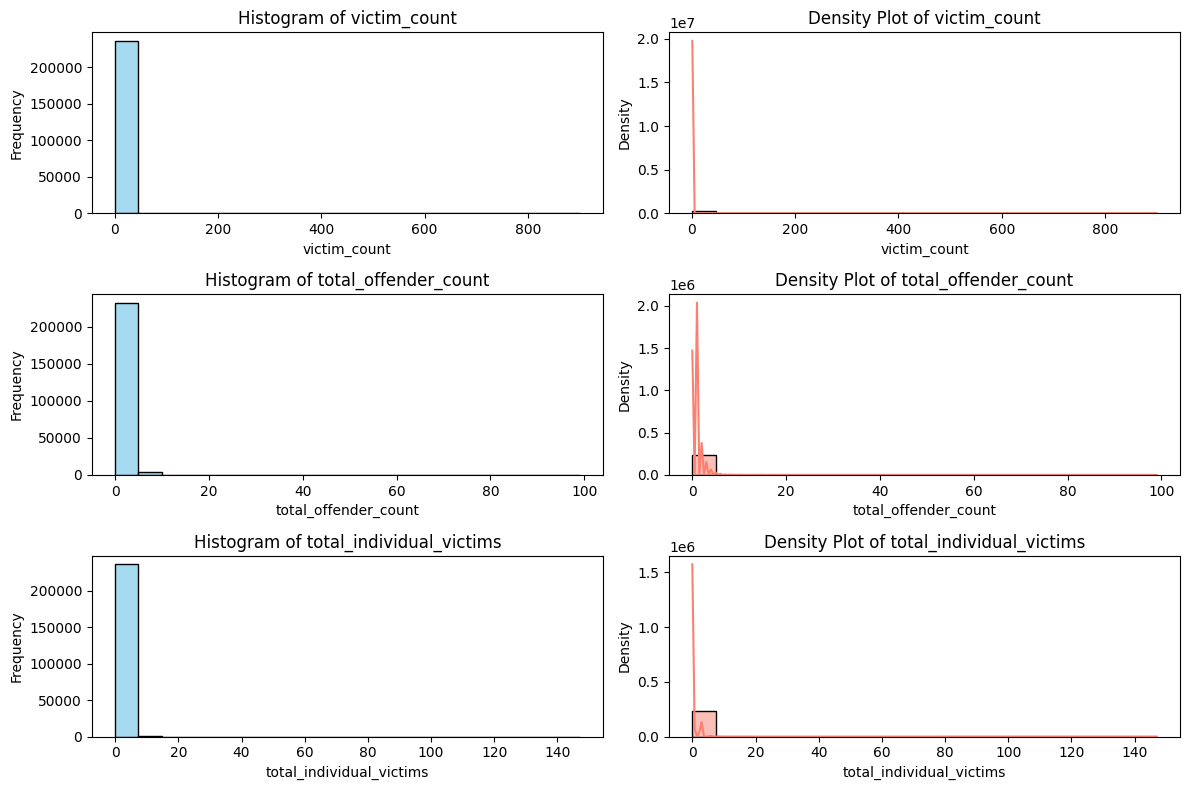

In [28]:
# Select numerical variables for visualization
numerical_vars = ['victim_count', 'total_offender_count', 'total_individual_victims']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=len(numerical_vars), ncols=2, figsize=(12, 8))

# Create histograms and density plots for each numerical variable
for i, var in enumerate(numerical_vars):
    # Histogram
    sns.histplot(data[var], ax=axes[i][0], kde=False, color='skyblue', bins=20)
    axes[i][0].set_title(f'Histogram of {var}')
    axes[i][0].set_xlabel(var)
    axes[i][0].set_ylabel('Frequency')

    # Density plot
    sns.histplot(data[var], ax=axes[i][1], kde=True, color='salmon', bins=20)
    axes[i][1].set_title(f'Density Plot of {var}')
    axes[i][1].set_xlabel(var)
    axes[i][1].set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### Bar and Pie Chart of Offender Race

/tmp/ipykernel_5266/626477029.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='offender_race', data=data, palette='pastel')
/tmp/ipykernel_5266/626477029.py:30: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, labels=[f'{label} ({percent:.1f}%)' for label, percent in zip(data['offender_race'].value_counts().index, percentages)], loc='center left', bbox_to_anchor=(1, 0.5))


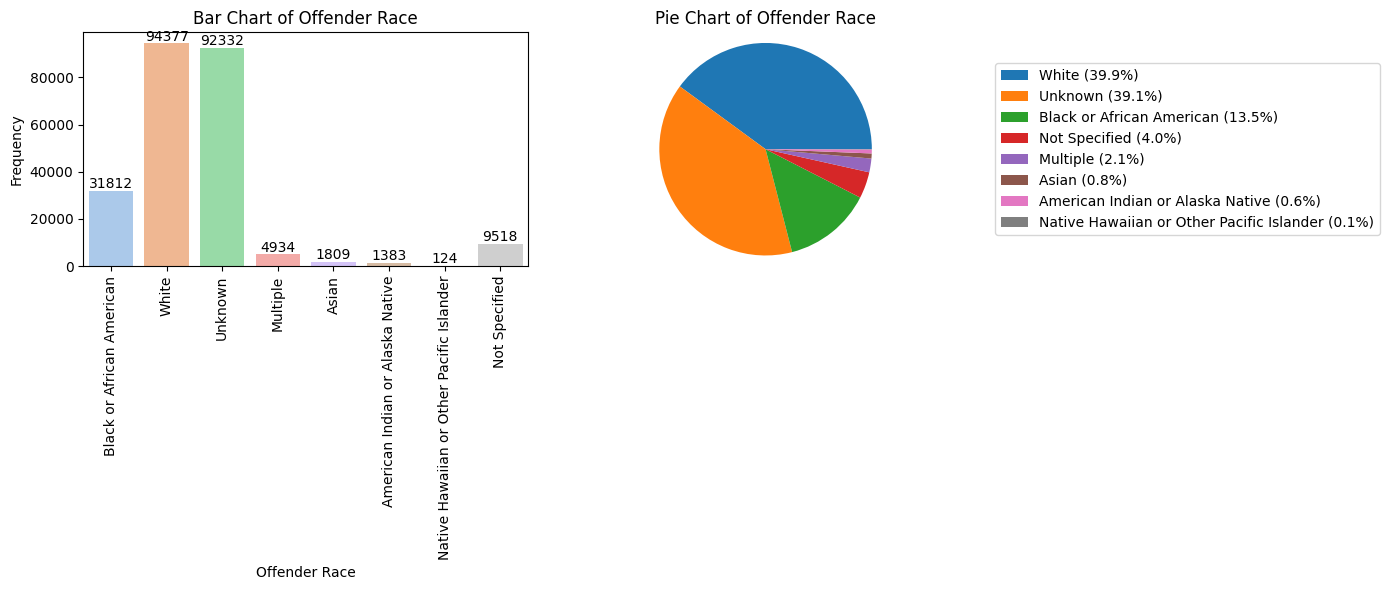

In [61]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting the bar chart
plt.subplot(1, 2, 1)
ax = sns.countplot(x='offender_race', data=data, palette='pastel')
plt.title('Bar Chart of Offender Race')
plt.xlabel('Offender Race')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5),  # Adjust this value to control the distance from the bar
                textcoords = 'offset points')

# Plotting the pie chart for offender race
plt.subplot(1, 2, 2)
patches, _ = plt.pie(data['offender_race'].value_counts(), autopct=None)
plt.title('Pie Chart of Offender Race')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Calculate percentages
percentages = [(count / len(data)) * 100 for count in data['offender_race'].value_counts()]

# Create a legend for the pie chart with percentages
plt.legend(patches, labels=[f'{label} ({percent:.1f}%)' for label, percent in zip(data['offender_race'].value_counts().index, percentages)], loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plots
plt.tight_layout()
plt.show()

### Bar Chart of Victim Types

/tmp/ipykernel_5266/850372332.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=victim_types, data=data, palette='pastel')


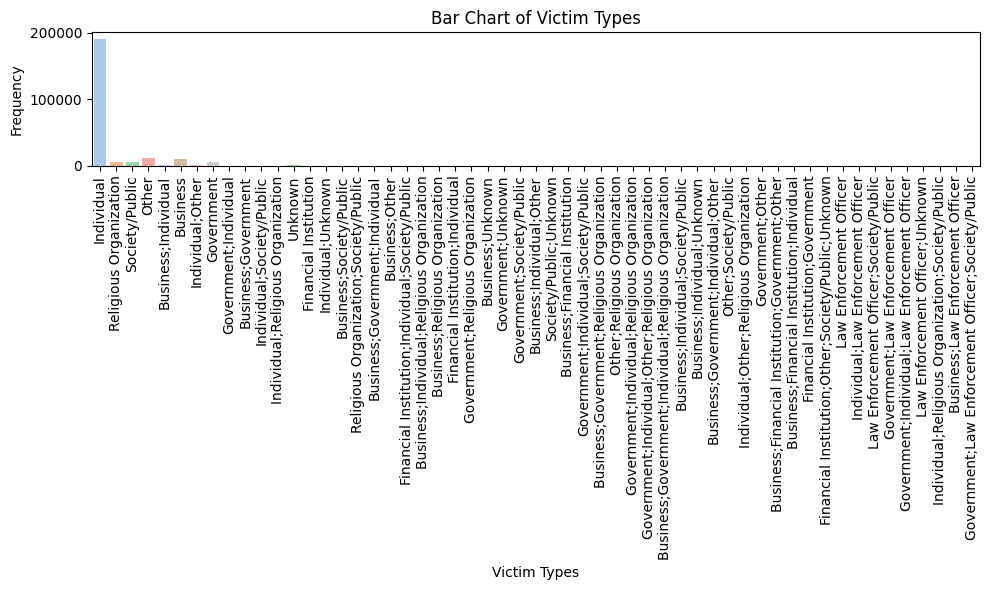

In [40]:
# Select the variable for visualization
victim_types = 'victim_types'

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create a bar chart for victim types
sns.countplot(x=victim_types, data=data, palette='pastel')
plt.title('Bar Chart of Victim Types')
plt.xlabel('Victim Types')
plt.ylabel('Frequency')

# Rotate x-axis labels at a 45-degree angle
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

### Bar and Pie Chart of Bias Category

/tmp/ipykernel_5266/2384060322.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bias_counts.index, y=bias_counts.values, palette='pastel',  width=0.5)


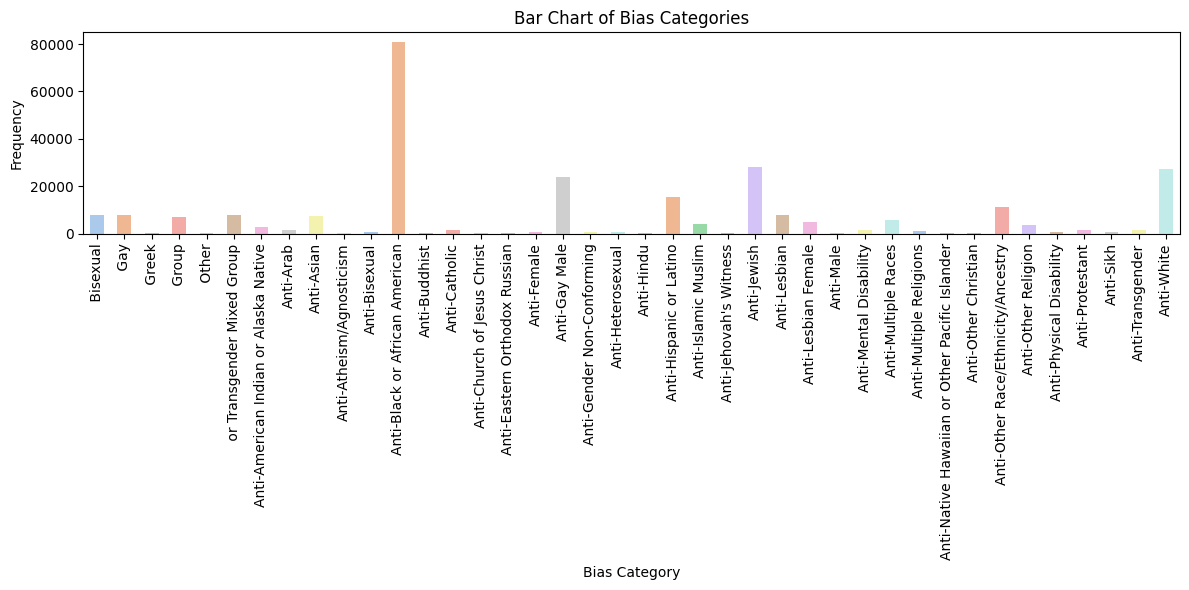

In [68]:
# Count the occurrences of each bias category
bias_counts = one_hot_bias_desc.sum()

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Create a bar chart for bias categories
ax = sns.barplot(x=bias_counts.index, y=bias_counts.values, palette='pastel',  width=0.5)
plt.title('Bar Chart of Bias Categories')
plt.xlabel('Bias Category')
plt.ylabel('Frequency')



# Rotate x-axis labels at a 45-degree angle for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_5266/161734164.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=bias_counts.index, y=bias_counts.values, palette='pastel', ax=axs[0], width=0.5)


/tmp/ipykernel_5266/161734164.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/tmp/ipykernel_5266/161734164.py:33: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax2.legend(patches, labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))


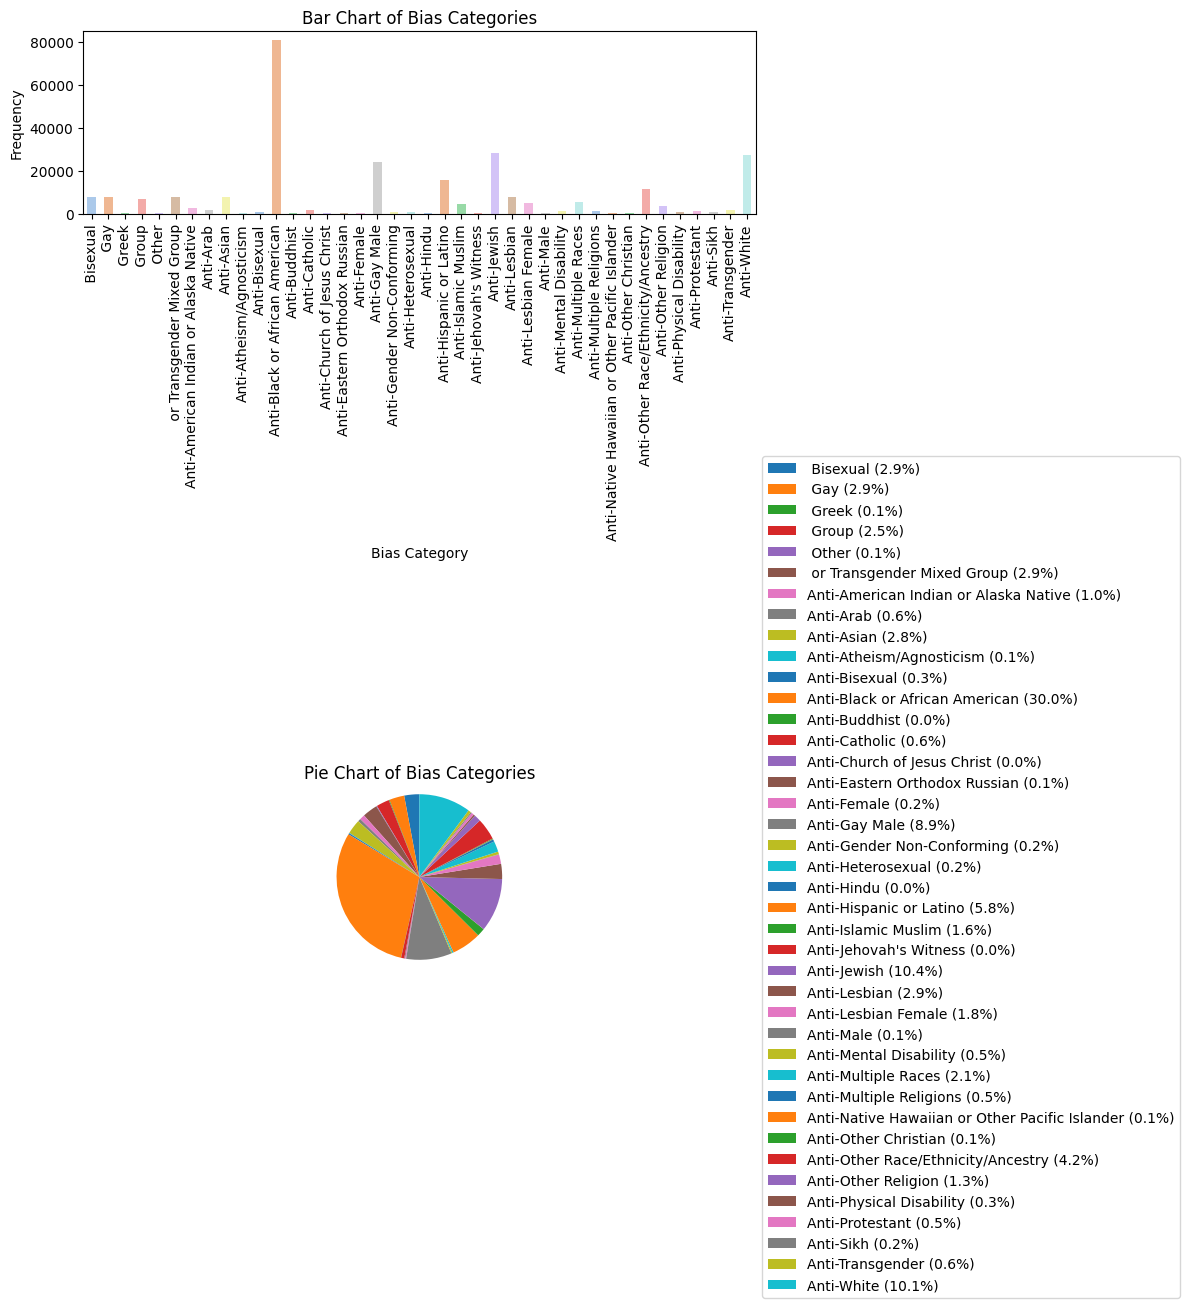

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each bias category
bias_counts = one_hot_bias_desc.sum()

# Calculate percentages
total = bias_counts.sum()
percentages = [(count / total) * 100 for count in bias_counts.values]

# Set up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Create a bar chart for bias categories
ax1 = sns.barplot(x=bias_counts.index, y=bias_counts.values, palette='pastel', ax=axs[0], width=0.5)
ax1.set_title('Bar Chart of Bias Categories')
ax1.set_xlabel('Bias Category')
ax1.set_ylabel('Frequency')

# Rotate x-axis labels at a 45-degree angle for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Create a pie chart for bias categories
ax2 = axs[1]
patches, texts, autotexts = ax2.pie(bias_counts.values, labels=bias_counts.index, autopct='%1.1f%%', startangle=90)

# Remove texts and percentages from the pie chart
for text in texts + autotexts:
    text.set_visible(False)

# Create a legend for the pie chart with percentages
legend_labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(bias_counts.index, percentages)]
ax2.legend(patches, labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')

# Set the title for the pie chart
ax2.set_title('Pie Chart of Bias Categories')

# Show the plot
plt.tight_layout()
plt.show()


In [44]:
# find the info for the offender_ethnicity column
data['victim_types'].value_counts()

victim_types
Individual                                               190923
Other                                                     12201
Business                                                  10084
Government                                                 6092
Religious Organization                                     5898
Society/Public                                             5456
Individual;Other                                           1594
Unknown                                                    1231
Business;Individual                                        1003
Individual;Society/Public                                   468
Law Enforcement Officer                                     389
Individual;Religious Organization                           245
Government;Individual                                       227
Financial Institution                                        95
Individual;Law Enforcement Officer                           93
Individual;Unknown         

### Time Plot of Hate Crime Incidents 

/tmp/ipykernel_5266/4101051106.py:14: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  incident_counts = data.resample('Y').size()  # Change 'Y' to 'M' for monthly counts


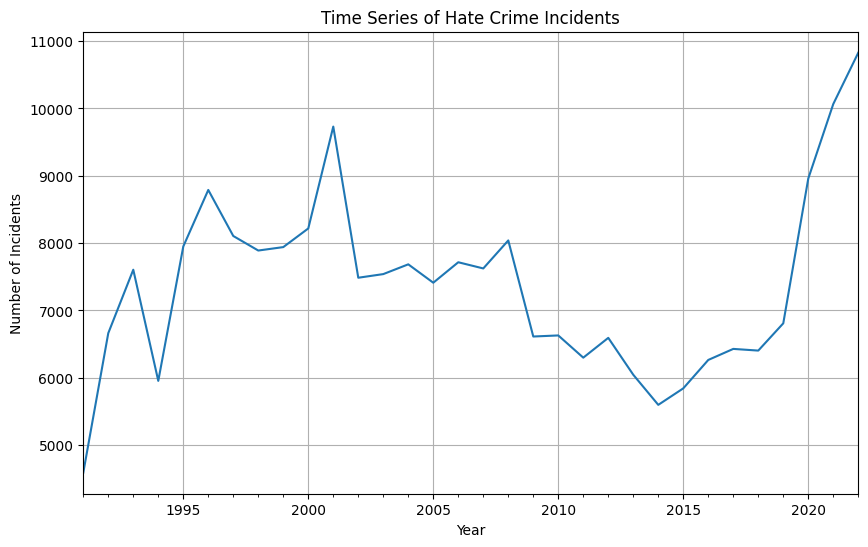

In [76]:
time = data

# Assuming 'time' is your DataFrame with hate crime incident data
# Convert 'incident_date' column to datetime format
time['incident_date'] = pd.to_datetime(time['incident_date'])

# Set 'incident_date' as the index of the DataFrame
time.set_index('incident_date', inplace=True)

#Sort 'incident date' in ascending order
time.sort_values(by='incident_date', inplace=True)

# Resample the data by year or month and count the number of incidents
# You can choose 'Y' for year or 'M' for month
incident_counts = data.resample('Y').size()  # Change 'Y' to 'M' for monthly counts

# Plot the time series graph
plt.figure(figsize=(10, 6))
incident_counts.plot()
plt.title('Time Series of Hate Crime Incidents')
plt.xlabel('Year')  # Change to 'Month' for monthly counts
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()